In [1]:
!pip install tensorflow opencv-python matplotlib
!pip list


Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1.3
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
et-xmlfile                   1.1.0
executing                    1.2.0
fastjsonschema               2.16.3


In [2]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Open the image using Pillow
            img = Image.open(image_path)

            # Get the image type
            image_type = img.format.lower()

            # Check if the image type is in the allowed extensions
            if image_type not in image_exts:
                print(image_type)
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)

        except Exception as e:
            print()
            print(image_type)
            print("not deleted")
            print('Issue with image: {}'.format(image_path))
            print()
            # os.remove(image_path)

In [ ]:
# Specify the directory containing your images
dir ="C:\\Users\\al7ra\\Downloads\\dataset\\dataset\\data\\RU"
# Create a new directory to store augmented images
output_dir = "RU_augmented"
os.makedirs(output_dir, exist_ok=True)
# List all the image files in the directory
image_files = os.listdir(dir)
# Loop through each image file and apply augmentation
for file in image_files:
    # Load the original image
    original_image = Image.open(os.path.join(dir, file))
    # Perform data augmentation transformations
    augmented_images = []
    # Add original image
    augmented_images.append((original_image, "original"))
    # Rotate image
    rotated_image = original_image.rotate(20)  # Rotation by 20 degrees
    augmented_images.append((rotated_image, "rotation"))
    # Apply random brightness enhancement
    brightness_factor = random.uniform(0.7, 1.3)
    brightness_enhancer = ImageEnhance.Brightness(original_image)
    brightened_image = brightness_enhancer.enhance(brightness_factor)
    augmented_images.append((brightened_image, "brightness"))
    # Apply random contrast enhancement
    contrast_factor = random.uniform(0.8, 1.2)
    contrast_enhancer = ImageEnhance.Contrast(original_image)
    contrasted_image = contrast_enhancer.enhance(contrast_factor)
    augmented_images.append((contrasted_image, "contrast"))
    # Apply random sharpness enhancement
    sharpness_factor = random.uniform(0.5, 1.5)
    sharpness_enhancer = ImageEnhance.Sharpness(original_image)
    sharpened_image = sharpness_enhancer.enhance(sharpness_factor)
    augmented_images.append((sharpened_image, "sharpness"))
    # Save augmented images to the output directory
    for augmented_image, transformation in augmented_images:
        output_filename = f"{transformation}_{file}"
        output_path = os.path.join(output_dir, output_filename)
        augmented_image.save(output_path)


In [5]:

data = tf.keras.utils.image_dataset_from_directory('data' , batch_size=32 , image_size=(256,256))


Found 19373 files belonging to 2 classes.


In [6]:

data_iterator = data.as_numpy_iterator()


In [7]:
batch = data_iterator.next()


In [8]:
batch[0].shape


(32, 256, 256, 3)

In [9]:
batch[0]

array([[[[250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         ...,
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ]],

        [[250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         ...,
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ]],

        [[250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         ...,
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ]],

        ...,

        [[159.12181 , 129.12181 ,  93.12181 ],
         [136.26614 , 106.26615 ,  70.26615 ]

In [10]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

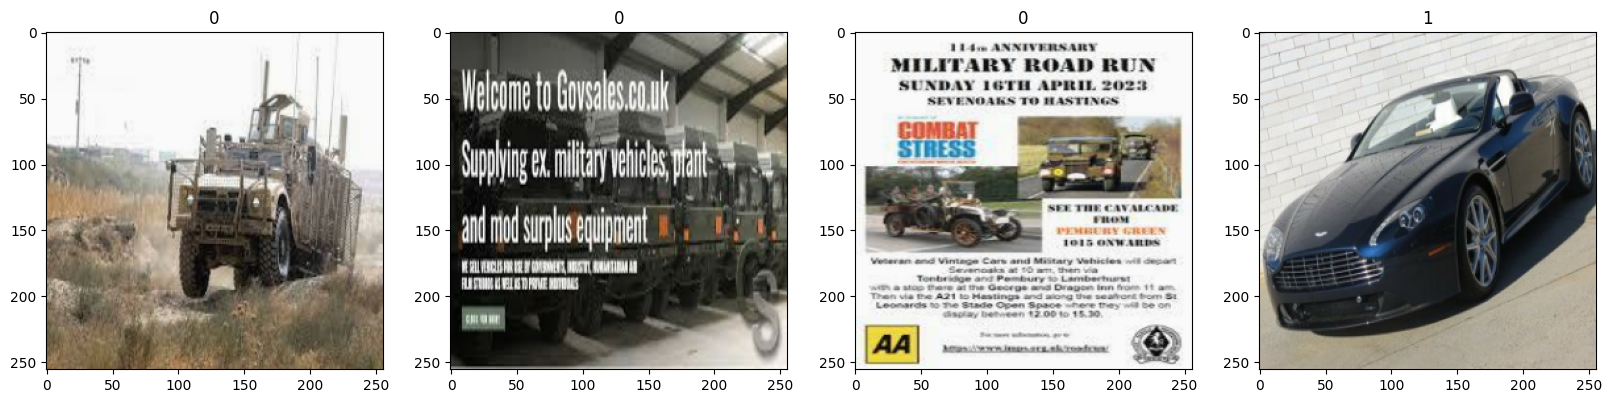

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:

data = data.map(lambda x,y: (x/255, y))


In [13]:
batch = data.as_numpy_iterator().next()


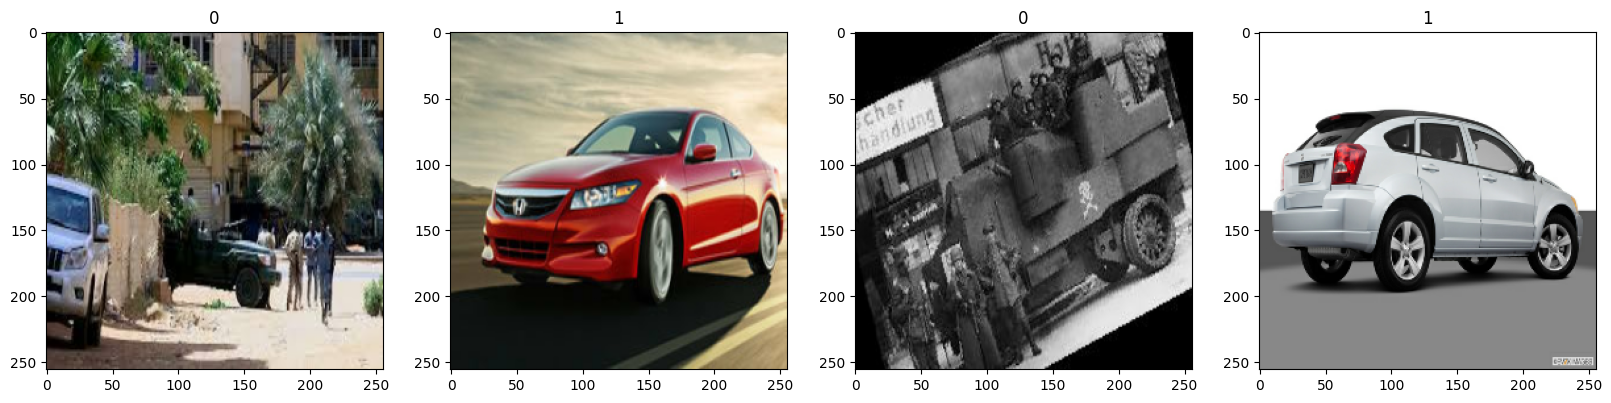

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback, reduce_lr])

Epoch 1/10
424/424 [==============================] - 1848s 4s/step - loss: 1.7167 - accuracy: 0.8676 - val_loss: 0.7146 - val_accuracy: 0.8262 - lr: 0.0010
Epoch 2/10
424/424 [==============================] - 1915s 5s/step - loss: 0.1791 - accuracy: 0.9405 - val_loss: 0.0942 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 3/10
424/424 [==============================] - 1755s 4s/step - loss: 0.1650 - accuracy: 0.9460 - val_loss: 0.1778 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 4/10
424/424 [==============================] - 1755s 4s/step - loss: 0.1099 - accuracy: 0.9626 - val_loss: 0.4360 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 5/10
424/424 [==============================] - 1758s 4s/step - loss: 0.1067 - accuracy: 0.9653 - val_loss: 0.3339 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 6/10
424/424 [==============================] - 1749s 4s/step - loss: 0.0827 - accuracy: 0.9717 - val_loss: 0.1343 - val_accuracy: 0.9509 - lr: 0.0010
Epoch 7/10
424/424 [==============================] - 1746

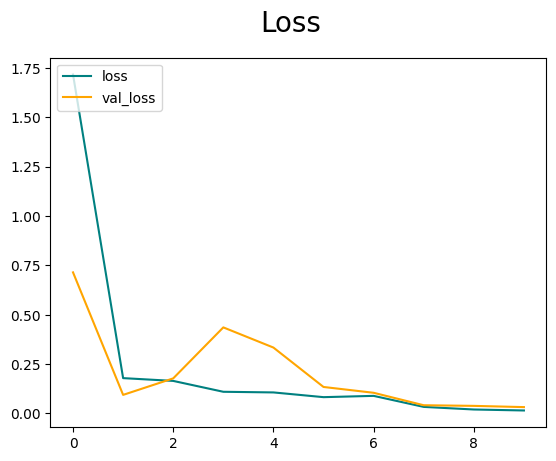

In [18]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

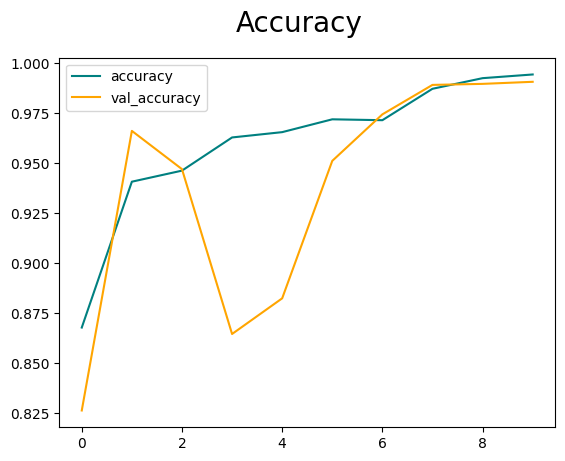

In [19]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [21]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [22]:

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 853ms/step


In [23]:

print("Precision:" ,pre.result().numpy(),", Recall :", re.result().numpy(),", Accuracy :", acc.result().numpy())


Precision: 0.99346405 , Recall : 0.987013 , Accuracy : 0.990625


In [35]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
file_path = r"C:\Users\al7ra\Downloads\dataset4 - Copy\dataset4\models\imageclassifier.h5"

new_model = load_model(file_path)
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 187ms/step


array([[0.9995254]], dtype=float32)

In [50]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                        

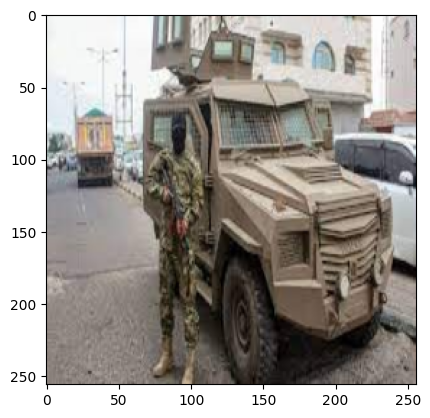

1/1 [==============================] - 0s 178ms/step
99 % chance that it is a military car


In [132]:
directory_path = "C:\\Users\\al7ra\\Downloads\\dataset\\dataset\\test"
img = cv2.imread(directory_path+'\\4.jpg')
resized_img = cv2.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()
yhat = model.predict(np.expand_dims(resized_img/255, 0))
if yhat > 0.5:
    print(int(yhat[0][0]*100), "% chance that it is a normal car")
else:
    print(100-int(yhat[0][0]*100), "% chance that it is a military car")